다음 2020년도 건강검진정보 샘플(1만건) 데이터를 이용하여 시각화 과정, 즉 탐색적 데이터 분석(Exploratory Data Analysis)을 수행하고 검진결과의 특징을 보여주시오. 

health_data.csv  (31개 항목, 1만건 데이터) 
health_data_description.xlsx  (데이터 설명) 

- matplotlib/seaborn/pandas 패키지를 이용하고, 필요하다면 엑셀 또는 파이썬 코드로 데이터 전처리 수행 
- 이용한 차트의 종류가 3가지 이상이어야 함 (산점도, 막대 그래프, 라인 그래프 등)
- 시각화 결과를 해석하고  3가지의 인사이트 도출하기 
- 코드는 github에 올리고 주소 제출

## 전처리

In [2]:
# 맥북 시각화 한글 오류 해결 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from matplotlib import rc

rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_csv('health_data.csv')
df.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [5]:
df.describe(include='all')

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
count,10000.0,10000.00000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,9912.000000,9912.00000,9912.000000,9912.000000,9998,9999,10000.000000,3251.000000,3251.000000,10000
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,1
top,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,Yes,NaN,NaN,NaN,12/29/2021
freq,NaN,NaN,NaN,5138,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6231,5819,NaN,NaN,NaN,10000
mean,2020.0,5000.50000,34.100100,NaN,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,...,0.848484,27.58979,26.789851,38.098668,NaN,NaN,0.325100,0.175331,0.579514,NaN
std,0.0,2886.89568,12.394581,NaN,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,...,0.301012,17.88442,23.735687,58.184579,NaN,NaN,0.468436,0.380308,0.591269,NaN
min,2020.0,1.00000,11.000000,NaN,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,...,0.050000,3.00000,2.000000,3.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,2020.0,2500.75000,27.000000,NaN,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,...,0.700000,20.00000,16.000000,16.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
50%,2020.0,5000.50000,41.000000,NaN,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,...,0.800000,24.00000,21.000000,24.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN
75%,2020.0,7500.25000,44.000000,NaN,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,...,1.000000,30.00000,31.000000,39.000000,NaN,NaN,1.000000,0.000000,1.000000,NaN


In [6]:
# 데이터 프레임 데이터 개수, 열 개수 확인
df.shape

(10000, 31)

In [7]:
# 변수별 Data type 확인
# 성별코드, 흡연상태, 음주여부, 데이터 공개 일자의 데이터 타입을 바꾸여야 할 필요가 있어 보임.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [8]:
# 성별 코드 M:0 F:1 로 각각 할당한다. 

ser_sex = []

for i in range(df.shape[0]):
  if df.성별코드[i] == 'M':
    ser_sex.append(0)
  elif df.성별코드[i] == 'F':
    ser_sex.append(1)

df['성별코드'] = ser_sex
df['성별코드']

0       0
1       1
2       1
3       0
4       1
       ..
9995    1
9996    1
9997    0
9998    1
9999    1
Name: 성별코드, Length: 10000, dtype: int64

In [9]:
# 흡연 상태 No:0 Notnow:1 Yes:2 로 각각 할당해준다. 

ser_smoke = []

for i in range(df.shape[0]):
  if df.흡연상태[i] == 'No':
    ser_smoke.append(0)
  elif df.흡연상태[i] == 'NotNow':
    ser_smoke.append(1)
  elif df.흡연상태[i] == 'Yes':
    ser_smoke.append(2)
  else:
    ser_smoke.append(np.nan)

df['흡연상태'] = ser_smoke
df['흡연상태']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    1.0
Name: 흡연상태, Length: 10000, dtype: float64

In [10]:
# 흡연상태 결측치 개수 확인
df['흡연상태'].isna().sum()

2

In [11]:
# 음주여부 No:0, Yes:1 로 각각 할당

ser_drink = []

for i in range(df.shape[0]):
  if df.음주여부[i] == 'No':
    ser_drink.append(0)
  elif df.음주여부[i] == 'Yes':
    ser_drink.append(1)
  else:
    ser_drink.append(np.nan)

df['음주여부'] = ser_drink
df['음주여부']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    1.0
9996    1.0
9997    0.0
9998    0.0
9999    1.0
Name: 음주여부, Length: 10000, dtype: float64

In [12]:
# 음주여부 결측치 개수 확인
df['음주여부'].isna().sum()

1

In [13]:
# 데이터 공개일자는 datetime 타입으로 바꿔준다. 
df['데이터공개일자']=pd.to_datetime(df['데이터공개일자'])

In [14]:
df['데이터공개일자']

0      2021-12-29
1      2021-12-29
2      2021-12-29
3      2021-12-29
4      2021-12-29
          ...    
9995   2021-12-29
9996   2021-12-29
9997   2021-12-29
9998   2021-12-29
9999   2021-12-29
Name: 데이터공개일자, Length: 10000, dtype: datetime64[ns]

In [15]:
# 성별코드, 흡연상태, 음주여부는 integer 타입으로, 데이터 공개 일자는 datetime 타입으로 변한 것을 확인 할 수 있음.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   기준년도         10000 non-null  int64         
 1   가입자일련번호      10000 non-null  int64         
 2   시도코드         10000 non-null  int64         
 3   성별코드         10000 non-null  int64         
 4   연령대코드(5세단위)  10000 non-null  int64         
 5   신장(5Cm단위)    10000 non-null  int64         
 6   체중(5Kg 단위)   10000 non-null  int64         
 7   허리둘레         10000 non-null  float64       
 8   시력(좌)        10000 non-null  float64       
 9   시력(우)        10000 non-null  float64       
 10  청력(좌)        10000 non-null  int64         
 11  청력(우)        10000 non-null  int64         
 12  수축기혈압        9912 non-null   float64       
 13  이완기혈압        9912 non-null   float64       
 14  식전혈당(공복혈당)   9912 non-null   float64       
 15  총콜레스테롤       4044 non-null   float64       
 16  트리글리세

## EDA

In [16]:
# 모든 칼럼 상관관계 확인
df.corr()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
기준년도,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
가입자일련번호,NaN,1.000000,-0.008010,0.000614,-0.000449,-0.000160,0.008043,0.009674,0.007315,0.002779,...,0.002259,-0.006584,0.004416,0.009970,-0.008721,-0.009003,-0.010324,0.017181,0.003093,-0.014908
시도코드,NaN,-0.008010,1.000000,-0.019076,0.004979,-0.006849,0.017924,0.028570,0.011446,0.020099,...,-0.013878,0.008967,-0.001253,-0.000956,0.013676,0.009992,-0.029548,-0.002763,0.029885,-0.009636
성별코드,NaN,0.000614,-0.019076,1.000000,0.077089,-0.722048,-0.559240,-0.400508,-0.080267,-0.088029,...,-0.044804,-0.396251,-0.094419,-0.189976,-0.214751,-0.603354,-0.321664,-0.085699,-0.080124,-0.057614
연령대코드(5세단위),NaN,-0.000449,0.004979,0.077089,1.000000,-0.370313,-0.244200,0.093462,-0.160858,-0.154320,...,0.031798,0.052185,0.050859,-0.067403,-0.051584,-0.170798,-0.343087,-0.122417,-0.073529,-0.092691
신장(5Cm단위),NaN,-0.000160,-0.006849,-0.722048,-0.370313,1.000000,0.669531,0.325550,0.115318,0.126602,...,0.032393,0.272686,0.049692,0.160759,0.162148,0.478687,0.349520,0.089061,0.061558,0.057054
체중(5Kg 단위),NaN,0.008043,0.017924,-0.559240,-0.244200,0.669531,1.000000,0.784348,0.080452,0.082611,...,0.045437,0.240535,0.104189,0.273995,0.181331,0.356963,0.254100,0.076001,0.076789,0.059054
허리둘레,NaN,0.009674,0.028570,-0.400508,0.093462,0.325550,0.784348,1.000000,0.009188,0.010575,...,0.046917,0.200725,0.127047,0.256491,0.173496,0.237116,0.100819,0.035370,0.051355,0.050502
시력(좌),NaN,0.007315,0.011446,-0.080267,-0.160858,0.115318,0.080452,0.009188,1.000000,0.200569,...,-0.008365,0.017444,-0.010974,0.016307,0.018035,0.056469,0.087574,0.012989,0.006433,-0.007884
시력(우),NaN,0.002779,0.020099,-0.088029,-0.154320,0.126602,0.082611,0.010575,0.200569,1.000000,...,-0.000979,0.070421,-0.011462,0.021923,0.011921,0.044136,0.074895,-0.005284,-0.001313,-0.006895


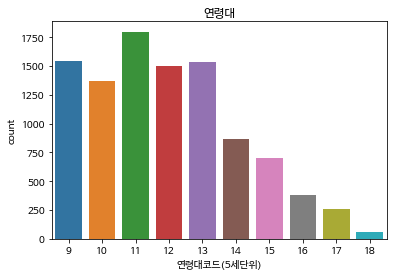

In [17]:
# 연령대 별로 countplot 확인
# 건강검진 데이터의 연령대는 40대 이상부터 존재하며 85세 이상까지 분포해 있다. 50~54세의 연령대의 데이터가 가장 많다. 65세 이상부터는 자료가 상대적으로 적어진다. 

sns.countplot(x='연령대코드(5세단위)',data=df)
plt.title("연령대")
plt.show()

In [18]:
# 연령대별 데이터 개수
df['연령대코드(5세단위)'].value_counts()

11    1798
9     1547
13    1534
12    1498
10    1369
14     865
15     698
16     377
17     259
18      55
Name: 연령대코드(5세단위), dtype: int64

In [20]:
# 상관 관계가 0.784로 체중과 허리둘레는 양의 상관관계가 있다. 
df[['체중(5Kg 단위)','허리둘레']].corr()

,체중(5Kg 단위),허리둘레
체중(5Kg 단위),1.000000,0.784348
허리둘레,0.784348,1.000000


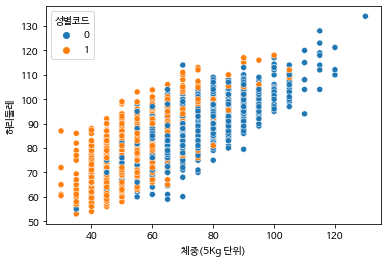

In [19]:
# 체중이 증가할 수록 허리둘레가 증가하는 비례 모습을 보인다. 성별로 확인해 보아도 남녀 모두 비례 전체적으로 비례함을 볼 수 있다. 
sns.scatterplot(x='체중(5Kg 단위)' , y='허리둘레', data =df, hue='성별코드')

In [21]:
# '흡연상태','총콜레스테롤','식전혈당(공복혈당)','수축기혈압','이완기혈압','치아우식증유무','치석' 만 따로 상관관계 확인 해보기. 
df[['흡연상태','총콜레스테롤','식전혈당(공복혈당)','수축기혈압','이완기혈압','치아우식증유무','치석']].corr()

,흡연상태,총콜레스테롤,식전혈당(공복혈당),수축기혈압,이완기혈압,치아우식증유무,치석
흡연상태,1.000000,-0.032282,0.106632,0.020822,0.097951,0.124442,0.104408
총콜레스테롤,-0.032282,1.000000,-0.080776,-0.015344,0.080146,0.006555,0.060477
식전혈당(공복혈당),0.106632,-0.080776,1.000000,0.141151,0.088654,0.027959,0.024954
수축기혈압,0.020822,-0.015344,0.141151,1.000000,0.704445,0.000755,-0.017897
이완기혈압,0.097951,0.080146,0.088654,0.704445,1.000000,0.019203,0.005298
치아우식증유무,0.124442,0.006555,0.027959,0.000755,0.019203,1.000000,0.204810
치석,0.104408,0.060477,0.024954,-0.017897,0.005298,0.204810,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


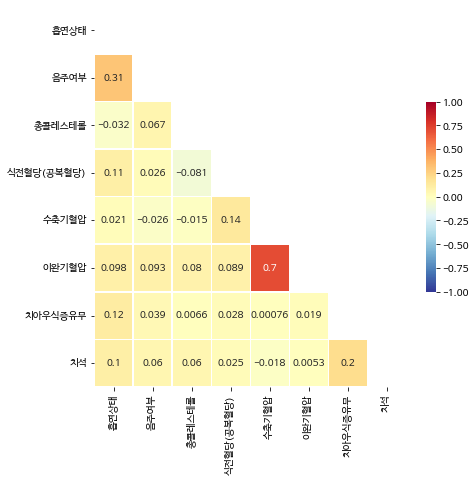

In [22]:
# 상관 관계를 토대로 히트맵 작성 
# 결과 : 이완기 혈압과 수축기 혈압의 강한 양의 상관 관계 확인 가능.

a = df[['흡연상태','음주여부','총콜레스테롤','식전혈당(공복혈당)','수축기혈압','이완기혈압','치아우식증유무','치석']].corr()
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(a, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(a, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

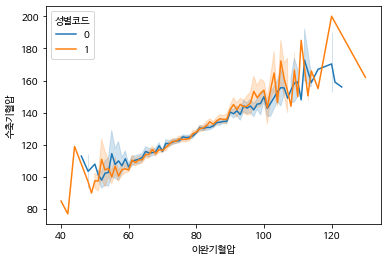

In [23]:
# 이완기 혈압과 수축기 혈압을 라인그래프로 그려본 결과, 남녀 모두 증가하는 선형 관계 모습을 관찰할 수 있다. 
sns.lineplot(x='이완기혈압', y='수축기혈압', hue='성별코드', data=df)

In [24]:
#'HDL콜레스테롤','총콜레스테롤','LDL콜레스테롤','트리글리세라이드'만 따로 상관 관계 확인
df[['HDL콜레스테롤','총콜레스테롤','LDL콜레스테롤','트리글리세라이드']].corr()

,HDL콜레스테롤,총콜레스테롤,LDL콜레스테롤,트리글리세라이드
HDL콜레스테롤,1.000000,0.235176,0.037269,-0.369379
총콜레스테롤,0.235176,1.000000,0.929562,0.226046
LDL콜레스테롤,0.037269,0.929562,1.000000,0.048083
트리글리세라이드,-0.369379,0.226046,0.048083,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


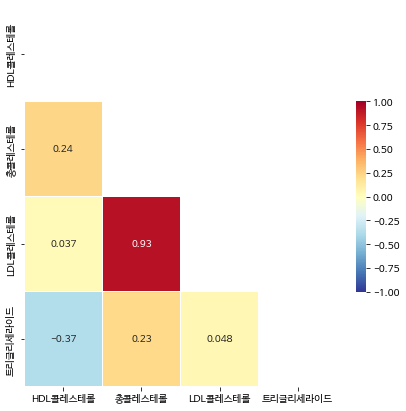

In [25]:
#'HDL콜레스테롤','총콜레스테롤','LDL콜레스테롤','트리글리세라이드' 의 상관 관계를 토대로 히트맵 작성
# 결과 : LDL 콜레스테롤, 총 콜레스테롤 사이의 강한 양의 상관 관계 (0.93)을 관찰할 수 있었음.

a = df[['HDL콜레스테롤','총콜레스테롤','LDL콜레스테롤','트리글리세라이드']].corr()
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(a, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(a, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

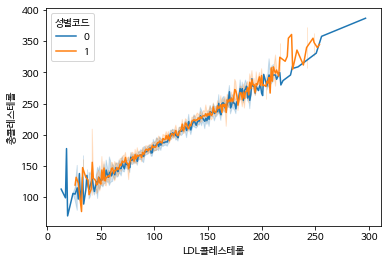

In [26]:
# LDL 콜레스테롤, 총콜레스테롤의 lineplot을 그려본 결과 남녀 모두 비례 선형 관계를 확인 할 수 있었다. 
sns.lineplot(x='LDL콜레스테롤', y='총콜레스테롤', hue='성별코드', data=df)